In [ ]:
pip install aspect-based-sentiment-analysis

In [ ]:
import aspect_based_sentiment_analysis as absa

nlp = absa.load()

In [3]:
import warnings
warnings.filterwarnings("ignore")
from google.colab import files

# Sentiment - price

In [8]:
path2 = '/content/drive/MyDrive/5153/meta_and_review_sentiment_aspect_delivery (1).csv'
df = pd.read_csv(path2)

In [9]:
text_df = df[['review']]
text_df['Ori_index'] = text_df.index

In [10]:
text_df.shape

(133159, 2)

In [11]:
price_aspect = ['price', 'pricing', 
                   'cost', 'charge']#fee --> feels; fees --> feestirrer; shipping fees; credit deduct fees

In [ ]:
#check price
import re
with pd.option_context ('display.max_colwidth', None):
  display (text_df[text_df.review.str.contains('cost')].review)

41                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [12]:
text_df.loc[text_df['review'].str.contains('price|pricing|cost|charge',regex=True), 'price_aspect'] = 1
text_df.price_aspect.fillna(0, inplace=True)

In [13]:
text_df.head()

,review,Ori_index,price_aspect
0,this was a good buy great shampoo and conditio...,0,0.0
1,i have used kms in the past and always loved t...,1,0.0
2,i remember kms products being a prestige salon...,2,1.0
3,this is a wonderful shampoo doesnt make your h...,3,1.0
4,i have a very dry frizzy hair i have tried man...,4,0.0


In [14]:
sum(text_df.price_aspect==1)

17795

In [15]:
price_idx = list(text_df[text_df.price_aspect==1].index)
long_text_512_idx_list = list(text_df[text_df.loc[:,'review'].str.len() >=1999].review.index)
priceindex_removed = [x  for x in price_idx if x in long_text_512_idx_list]
len(priceindex_removed)

418

In [16]:
#update package index
#remove extremel long text which this package can not handle
price_idx =[x for x in price_idx if x not in priceindex_removed]

In [ ]:
len(price_idx)

17377

In [23]:
#since the package is taking too long to run. The price aspect will be run in parallel and merged later
for idx in price_idx[13000:]:  
  price, _  = nlp(text_df.review.iloc[idx], aspects=['price', 'pricing'])
  text_df.loc[idx, 'neu_price'] = price.scores[0]
  text_df.loc[idx,'neg_price'] = price.scores[1]
  text_df.loc[idx,'pos_price'] = price.scores[2]

In [29]:
# impute na by zero 
text_df = text_df.fillna(0)

In [24]:
text_df.to_csv('review_sentiment_aspect_price13000_.csv', index=None)
files.download('review_sentiment_aspect_price13000_.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#merge with 
#review_sentiment_aspect_price 5772 ( [:, 7746])
#review_sentiment_aspect_price57721_83537.csv'  ([ 7746: 11000])
#review_sentiment_aspect_price83537_99198 ([11000: 13000])

# Merge price aspect with all other aspects

In [30]:
#devliery, custoemr service aspect
path2 = '/content/drive/MyDrive/5153/meta_and_review_sentiment_aspect_delivery_cs.csv'
df= pd.read_csv(path2)

In [31]:
df.columns

Index(['Unnamed: 0', 'asin', 'review_x', 'overall', 'helpful', 'summary',
       'unixReviewTime', 'reviewTime', 'reviewerID', 'title', 'brand', 'price',
       'salesRank', 'polarity_score', 'neutral_score', 'negative_score',
       'positive_score', 'neu_delivery', 'neg_delivery', 'pos_delivery',
       'neu_shipment', 'neg_shipment', 'pos_shipment', 'review_len',
       'review_y', 'Ori_index', 'customer_aspect', 'neu_return_policy',
       'neg_return_policy', 'pos_return_policy', 'neu_exchange',
       'neg_exchange', 'pos_exchange', 'neu_service', 'neg_service',
       'pos_service', 'neu_support', 'neg_support', 'pos_support'],
      dtype='object')

In [32]:
#delivery: shipment, delivery
#customer service: exchange, return, service, support
df.iloc[:2]

,Unnamed: 0,asin,review_x,overall,helpful,summary,unixReviewTime,reviewTime,reviewerID,title,brand,price,salesRank,polarity_score,neutral_score,negative_score,positive_score,neu_delivery,neg_delivery,pos_delivery,neu_shipment,neg_shipment,pos_shipment,review_len,review_y,Ori_index,customer_aspect,neu_return_policy,neg_return_policy,pos_return_policy,neu_exchange,neg_exchange,pos_exchange,neu_service,neg_service,pos_service,neu_support,neg_support,pos_support
0,0,1929099886,this was a good buy great shampoo and conditio...,4.0,"[0, 0]",good shampoo and conditioner,1355011200,"12 9, 2012",A2BQ8DVGEGWAFY,bumble and bumble quenching shampoo and condit...,0,62.99,83112,0.7783,0.737,0.038,0.224,0.0,0.0,0.0,0.0,0.0,0.0,144,this was a good buy great shampoo and conditio...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5357954771,i have used kms in the past and always loved t...,3.0,"[0, 0]",not too impressed,1376352000,"08 13, 2013",A2Z9QP4MZ2HXCZ,moisture repair conditioner by kms for unisex ...,KMS,10.79,108278,0.1546,0.699,0.158,0.143,0.0,0.0,0.0,0.0,0.0,0.0,110,i have used kms in the past and always loved t...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.iloc[-2:]

,Unnamed: 0,asin,review_x,overall,helpful,summary,unixReviewTime,reviewTime,reviewerID,title,brand,price,salesRank,polarity_score,neutral_score,negative_score,positive_score,neu_delivery,neg_delivery,pos_delivery,neu_shipment,neg_shipment,pos_shipment,review_len,review_y,Ori_index,customer_aspect,neu_return_policy,neg_return_policy,pos_return_policy,neu_exchange,neg_exchange,pos_exchange,neu_service,neg_service,pos_service,neu_support,neg_support,pos_support
133157,133164,B00KYWMYEE,definitely worth the money,5.0,"[0, 0]",five stars,1404086400,"06 30, 2014",A385AA5J7QK4VB,lcl beauty reclining hydraulic all purpose cut...,0,149.88,38890,0.5574,0.303,0.000,0.697,0.0,0.0,0.0,0.0,0.0,0.0,26,definitely worth the money,133157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133158,133165,B00L5YAROY,hydraulic fluid leaked all over while it was s...,2.0,"[0, 0]",poorly shipped and missing parts,1404950400,"07 10, 2014",A1P3L5YQB5U0Z5,exacme classic hydraulic barber chair salon be...,0,109.90,106280,-0.0000,0.668,0.179,0.152,0.0,0.0,0.0,0.0,0.0,0.0,180,hydraulic fluid leaked all over while it was s...,133158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df.drop(['Unnamed: 0', 'review_y', 'Ori_index', 'customer_aspect'], axis=1, inplace=True)
df=df.rename(columns= {'review_x':'review'})
df.iloc[:2]

,asin,review,overall,helpful,summary,unixReviewTime,reviewTime,reviewerID,title,brand,price,salesRank,polarity_score,neutral_score,negative_score,positive_score,neu_delivery,neg_delivery,pos_delivery,neu_shipment,neg_shipment,pos_shipment,review_len,neu_return_policy,neg_return_policy,pos_return_policy,neu_exchange,neg_exchange,pos_exchange,neu_service,neg_service,pos_service,neu_support,neg_support,pos_support
0,1929099886,this was a good buy great shampoo and conditio...,4.0,"[0, 0]",good shampoo and conditioner,1355011200,"12 9, 2012",A2BQ8DVGEGWAFY,bumble and bumble quenching shampoo and condit...,0,62.99,83112,0.7783,0.737,0.038,0.224,0.0,0.0,0.0,0.0,0.0,0.0,144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5357954771,i have used kms in the past and always loved t...,3.0,"[0, 0]",not too impressed,1376352000,"08 13, 2013",A2Z9QP4MZ2HXCZ,moisture repair conditioner by kms for unisex ...,KMS,10.79,108278,0.1546,0.699,0.158,0.143,0.0,0.0,0.0,0.0,0.0,0.0,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#merge package aspect to delivery and customer service aspects
path3 ='/content/drive/MyDrive/5153/review_sentiment_aspect_package.csv'
df_pack = pd.read_csv(path3)
df_pack.iloc[:2]

,review,Ori_index,package_aspect,neu_pack,neg_pack,pos_pack,neu_package,neg_package,pos_package
0,this was a good buy great shampoo and conditio...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,i have used kms in the past and always loved t...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df= df.merge (df_pack, left_index=True, right_on = 'Ori_index').drop(['review_y', 'Ori_index', 'package_aspect'], axis=1)

In [36]:
#delivery: shipment, delivery
#customer service: return, exchange, service, support, 
#package: pack, package 
df=df.rename(columns = {'review_x':'review'})
df.iloc[:2]

,asin,review,overall,helpful,summary,unixReviewTime,reviewTime,reviewerID,title,brand,price,salesRank,polarity_score,neutral_score,negative_score,positive_score,neu_delivery,neg_delivery,pos_delivery,neu_shipment,neg_shipment,pos_shipment,review_len,neu_return_policy,neg_return_policy,pos_return_policy,neu_exchange,neg_exchange,pos_exchange,neu_service,neg_service,pos_service,neu_support,neg_support,pos_support,neu_pack,neg_pack,pos_pack,neu_package,neg_package,pos_package
0,1929099886,this was a good buy great shampoo and conditio...,4.0,"[0, 0]",good shampoo and conditioner,1355011200,"12 9, 2012",A2BQ8DVGEGWAFY,bumble and bumble quenching shampoo and condit...,0,62.99,83112,0.7783,0.737,0.038,0.224,0.0,0.0,0.0,0.0,0.0,0.0,144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5357954771,i have used kms in the past and always loved t...,3.0,"[0, 0]",not too impressed,1376352000,"08 13, 2013",A2Z9QP4MZ2HXCZ,moisture repair conditioner by kms for unisex ...,KMS,10.79,108278,0.1546,0.699,0.158,0.143,0.0,0.0,0.0,0.0,0.0,0.0,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#since price aspects are executed in parallel, merge all price aspects 
#review_sentiment_aspect_price13000_.csv ([13000:])
#merge with 
#review_sentiment_aspect_price 5772 ( [:, 7746])
#review_sentiment_aspect_price57721_83537.csv'  ([ 7746: 11000])
#review_sentiment_aspect_price83537_99198 ([11000: 13000])

In [37]:
path4 ='/content/drive/MyDrive/5153/review_sentiment_aspect_price 57721.csv'
df_price = pd.read_csv(path4)
df_price.iloc[:2]

,review,Ori_index,price_aspect,neu_price,neg_price,pos_price
0,this was a good buy great shampoo and conditio...,0,0.0,0.0,0.0,0.0
1,i have used kms in the past and always loved t...,1,0.0,0.0,0.0,0.0


In [38]:
len(price_idx)

17377

In [41]:
price_idx[7746]

57721

In [42]:
path5 ='/content/drive/MyDrive/5153/review_sentiment_aspect_price57721_83537.csv'
df_price2 = pd.read_csv(path5)
df_price2.iloc[:2]

,review,Ori_index,price_aspect,neu_price,neg_price,pos_price
0,this was a good buy great shampoo and conditio...,0,0.0,NaN,NaN,NaN
1,i have used kms in the past and always loved t...,1,0.0,NaN,NaN,NaN


In [43]:
price_idx[11000-1]

83537

In [45]:
for idx in price_idx[7746:11000]:
  df_price.loc[idx, 'neu_price'] = df_price2.loc[idx, 'neu_price']
  df_price.loc[idx, 'neg_price'] = df_price2.loc[idx, 'neg_price']
  df_price.loc[idx, 'pos_price'] = df_price2.loc[idx, 'pos_price']

In [47]:
path6= '/content/drive/MyDrive/5153/review_sentiment_aspect_price83537_99198.csv'
df_price2 = pd.read_csv(path6)
df_price2.iloc[:2]

,review,Ori_index,price_aspect,neu_price,neg_price,pos_price
0,this was a good buy great shampoo and conditio...,0,0.0,NaN,NaN,NaN
1,i have used kms in the past and always loved t...,1,0.0,NaN,NaN,NaN


In [48]:
price_idx[13000-1]

99198

In [50]:
for idx in price_idx[11000:13000]:
  df_price.loc[idx, 'neu_price'] = df_price2.loc[idx, 'neu_price']
  df_price.loc[idx, 'neg_price'] = df_price2.loc[idx, 'neg_price']
  df_price.loc[idx, 'pos_price'] = df_price2.loc[idx, 'pos_price']

In [52]:
path7= '/content/drive/MyDrive/5153/review_sentiment_aspect_price13000_.csv'
df_price2 = pd.read_csv(path7)
df_price2.iloc[:2]

,review,Ori_index,price_aspect,neu_price,neg_price,pos_price
0,this was a good buy great shampoo and conditio...,0,0.0,NaN,NaN,NaN
1,i have used kms in the past and always loved t...,1,0.0,NaN,NaN,NaN


In [55]:
for idx in price_idx[13000:]:
  df_price.loc[idx, 'neu_price'] = df_price2.loc[idx, 'neu_price']
  df_price.loc[idx, 'neg_price'] = df_price2.loc[idx, 'neg_price']
  df_price.loc[idx, 'pos_price'] = df_price2.loc[idx, 'pos_price']

In [58]:
sum(df_price.isnull().any())

0

In [60]:
len(df_price[df_price.pos_price!=0])

17377

In [63]:
#merge the current df_price to df 
#merge full price aspects with all other aspects
df =df.merge (df_price, left_index=True, right_on = 'Ori_index')
df.columns

Index(['asin', 'review_x', 'overall', 'helpful', 'summary', 'unixReviewTime',
       'reviewTime', 'reviewerID', 'title', 'brand', 'price', 'salesRank',
       'polarity_score', 'neutral_score', 'negative_score', 'positive_score',
       'neu_delivery', 'neg_delivery', 'pos_delivery', 'neu_shipment',
       'neg_shipment', 'pos_shipment', 'review_len', 'neu_return_policy',
       'neg_return_policy', 'pos_return_policy', 'neu_exchange',
       'neg_exchange', 'pos_exchange', 'neu_service', 'neg_service',
       'pos_service', 'neu_support', 'neg_support', 'pos_support', 'neu_pack',
       'neg_pack', 'pos_pack', 'neu_package', 'neg_package', 'pos_package',
       'review_y', 'Ori_index', 'price_aspect', 'neu_price', 'neg_price',
       'pos_price'],
      dtype='object')

In [64]:
df.drop(['review_y', 'Ori_index', 'price_aspect'], axis=1, inplace=True)
df.iloc[:2]

,asin,review_x,overall,helpful,summary,unixReviewTime,reviewTime,reviewerID,title,brand,price,salesRank,polarity_score,neutral_score,negative_score,positive_score,neu_delivery,neg_delivery,pos_delivery,neu_shipment,neg_shipment,pos_shipment,review_len,neu_return_policy,neg_return_policy,pos_return_policy,neu_exchange,neg_exchange,pos_exchange,neu_service,neg_service,pos_service,neu_support,neg_support,pos_support,neu_pack,neg_pack,pos_pack,neu_package,neg_package,pos_package,neu_price,neg_price,pos_price
0,1929099886,this was a good buy great shampoo and conditio...,4.0,"[0, 0]",good shampoo and conditioner,1355011200,"12 9, 2012",A2BQ8DVGEGWAFY,bumble and bumble quenching shampoo and condit...,0,62.99,83112,0.7783,0.737,0.038,0.224,0.0,0.0,0.0,0.0,0.0,0.0,144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5357954771,i have used kms in the past and always loved t...,3.0,"[0, 0]",not too impressed,1376352000,"08 13, 2013",A2Z9QP4MZ2HXCZ,moisture repair conditioner by kms for unisex ...,KMS,10.79,108278,0.1546,0.699,0.158,0.143,0.0,0.0,0.0,0.0,0.0,0.0,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df = df.rename (columns ={'review_x':'review'})
df.iloc[:2]

,asin,review,overall,helpful,summary,unixReviewTime,reviewTime,reviewerID,title,brand,price,salesRank,polarity_score,neutral_score,negative_score,positive_score,neu_delivery,neg_delivery,pos_delivery,neu_shipment,neg_shipment,pos_shipment,review_len,neu_return_policy,neg_return_policy,pos_return_policy,neu_exchange,neg_exchange,pos_exchange,neu_service,neg_service,pos_service,neu_support,neg_support,pos_support,neu_pack,neg_pack,pos_pack,neu_package,neg_package,pos_package,neu_price,neg_price,pos_price
0,1929099886,this was a good buy great shampoo and conditio...,4.0,"[0, 0]",good shampoo and conditioner,1355011200,"12 9, 2012",A2BQ8DVGEGWAFY,bumble and bumble quenching shampoo and condit...,0,62.99,83112,0.7783,0.737,0.038,0.224,0.0,0.0,0.0,0.0,0.0,0.0,144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5357954771,i have used kms in the past and always loved t...,3.0,"[0, 0]",not too impressed,1376352000,"08 13, 2013",A2Z9QP4MZ2HXCZ,moisture repair conditioner by kms for unisex ...,KMS,10.79,108278,0.1546,0.699,0.158,0.143,0.0,0.0,0.0,0.0,0.0,0.0,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([ 2171.,  3173.,  3572.,  3894.,  6586.,  4440.,  7485., 12426.,
        25435., 63977.]),
 array([-0.9963 , -0.79668, -0.59706, -0.39744, -0.19782,  0.0018 ,
         0.20142,  0.40104,  0.60066,  0.80028,  0.9999 ]),
 <a list of 10 Patch objects>)

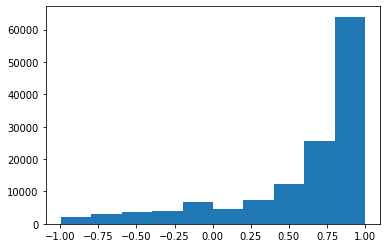

In [66]:
import matplotlib.pyplot as plt
plt.hist(df.polarity_score) #-1 to 1

In [69]:
df.to_csv('meta_and_review_sentiment_delivery_customer_package_price.csv', index=None)
files.download('meta_and_review_sentiment_delivery_customer_package_price.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
pd.read_csv('meta_and_review_sentiment_delivery_customer_package_price.csv').iloc[:2]

,asin,review,overall,helpful,summary,unixReviewTime,reviewTime,reviewerID,title,brand,price,salesRank,polarity_score,neutral_score,negative_score,positive_score,neu_delivery,neg_delivery,pos_delivery,neu_shipment,neg_shipment,pos_shipment,review_len,neu_return_policy,neg_return_policy,pos_return_policy,neu_exchange,neg_exchange,pos_exchange,neu_service,neg_service,pos_service,neu_support,neg_support,pos_support,neu_pack,neg_pack,pos_pack,neu_package,neg_package,pos_package,neu_price,neg_price,pos_price
0,1929099886,this was a good buy great shampoo and conditio...,4.0,"[0, 0]",good shampoo and conditioner,1355011200,"12 9, 2012",A2BQ8DVGEGWAFY,bumble and bumble quenching shampoo and condit...,0,62.99,83112,0.7783,0.737,-0.038,0.224,0.0,-0.0,0.0,0.0,-0.0,0.0,144,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
1,5357954771,i have used kms in the past and always loved t...,3.0,"[0, 0]",not too impressed,1376352000,"08 13, 2013",A2Z9QP4MZ2HXCZ,moisture repair conditioner by kms for unisex ...,KMS,10.79,108278,0.1546,0.699,-0.158,0.143,0.0,-0.0,0.0,0.0,-0.0,0.0,110,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
